# Text Summariztion 

1. Using Kohonen maps

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from minisom import MiniSom
import numpy as np

# Example sentences
sentences = ["Sentence one...", "Sentence two..."]

# Vectorize
vec = TfidfVectorizer(stop_words='english')
X = vec.fit_transform(sentences).toarray()

# Train SOM
som = MiniSom(10, 10, X.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(X, 100)

# Map sentences to BMUs
bmu_mapping = {}
for idx, x in enumerate(X):
    bmu = som.winner(x)
    bmu_mapping.setdefault(bmu, []).append(idx)

# Pick representative from each cluster
summary_sentences = []
for bmu, idxs in bmu_mapping.items():
    rep_idx = min(idxs, key=lambda i: np.linalg.norm(X[i] - som.get_weights()[bmu]))
    summary_sentences.append(sentences[rep_idx])

# Sort by original order
summary_sentences.sort(key=lambda s: sentences.index(s))
summary = " ".join(summary_sentences)
print(summary)


Sentence one...


2. K-means Clustering

In [4]:
# pip install scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans
import numpy as np

def kmeans_summary_tfidf(sentences, K=5):
    vec = TfidfVectorizer(stop_words='english', max_df=0.9, min_df=1)
    X = vec.fit_transform(sentences)            # sparse matrix
    kmeans = MiniBatchKMeans(n_clusters=K, random_state=42, batch_size=100)
    kmeans.fit(X)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_          # dense

    rep_indices = []
    for cluster in range(K):
        idxs = np.where(labels == cluster)[0]
        if len(idxs) == 0:
            continue
        # compute distances from centroid -> choose nearest
        dists = np.linalg.norm(X[idxs].toarray() - centers[cluster], axis=1)
        rep = idxs[np.argmin(dists)]
        rep_indices.append(rep)

    # Order by original position for coherence
    rep_indices = sorted(rep_indices)
    summary = " ".join([sentences[i] for i in rep_indices])
    return summary


In [5]:
sntences_test = [
    "This Project represents the work related to Text Summarization. In this paper, we present a framework for summarizing the huge information",
    "Text Summarization is the process of identifying the most important and meaningful information in an input document",
    "IELTS Ready brings all our most popular IELTS preparation materials into one spot so you can easily browse what's on offer and track your progress.",
    "Get the IELTS score you're aiming for with our wealth of IELTS test preparation resources.",
    "Browse individual IELTS materials below, or sign up for IELTS Ready to access all our resources in one convenient platform. "
]

summary = kmeans_summary_tfidf(sntences_test, K=2)
print(summary)

c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Get the IELTS score you're aiming for with our wealth of IELTS test preparation resources. Browse individual IELTS materials below, or sign up for IELTS Ready to access all our resources in one convenient platform. 


c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


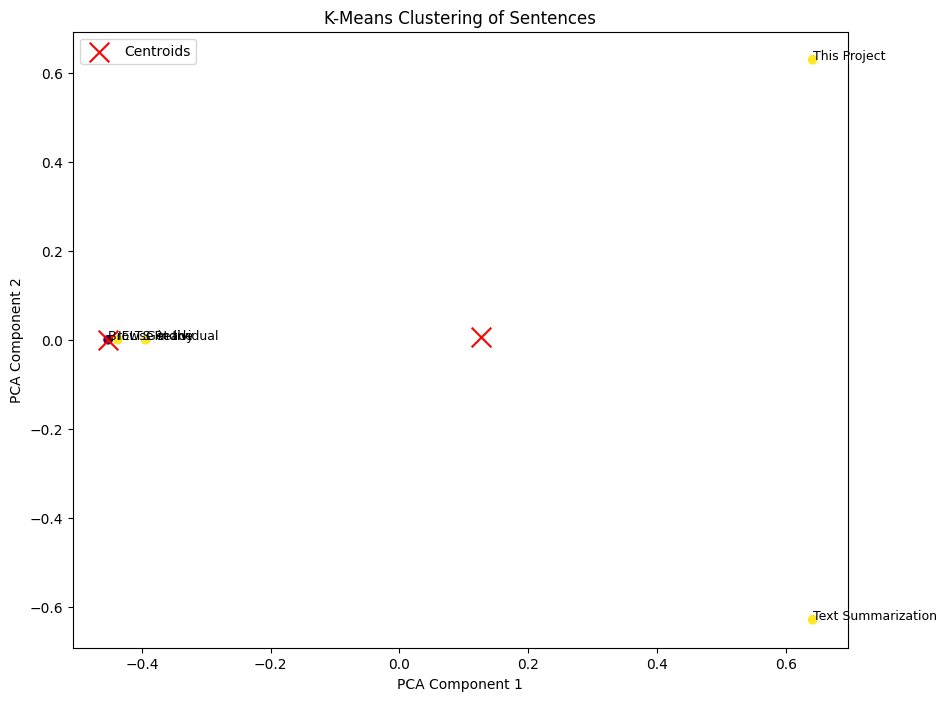

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

def plot_kmeans_clusters(sentences, K=5):
    vec = TfidfVectorizer(stop_words='english', max_df=0.9, min_df=1)
    X = vec.fit_transform(sentences).toarray()  # dense matrix
    kmeans = MiniBatchKMeans(n_clusters=K, random_state=42, batch_size=100)
    kmeans.fit(X)
    
    # Reduce dimensions for visualization
    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(X)

    plt.figure(figsize=(10, 8))
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')
    
    for i, sentence in enumerate(sentences):
        plt.annotate(" ".join(sentence.split()[:2]), (X_reduced[i, 0], X_reduced[i, 1]), fontsize=9, color='black')

    centers = pca.transform(kmeans.cluster_centers_)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Centroids')
    
    plt.title('K-Means Clustering of Sentences')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.show()

plot_kmeans_clusters(sntences_test, K=2)

TODO:
1. Instead of PCA: random forest feature extraction 
2. Kohonen Maps
3. 